In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LinearRegression


In [ ]:
# في هذه الخطوة قمنا باستدعاء البيانات و حذفنا العمود الاول لانه عبارة عن تسلسل وقمنا بعرض اول خمس صفوف من البيانات
diamond = pd.read_csv('/content/sample_data/train.csv')

# drop Unnamed: 0 column (just index)
diamond = diamond.drop(['Unnamed: 0'], axis=1)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
# من هذه الخطوة نعرف هل ان البينات فيها نقص بالمعلومات او لا بالاضافة الى نوع كل عمود واسماء الاعمدة في قاعدة البيانات
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
diamond.shape

(43040, 10)

In [ ]:
# عرض الاحصائيات الخاصة في قاعدة البيانات ومحاولة معرفة واستخلاص بعض المعلومات المهمة عن الديتا وفي مشروعنا هذا وجدنا ان بعض القيم لل x,y,z هي قيم صفرية وهذا غير منطقي لانها تمثل ابعاد الجوهرة
diamond.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


          carat     depth     table     price         x         y         z
carat  1.000000  0.022599  0.191260  0.923801  0.974368  0.946001  0.948625
depth  0.022599  1.000000 -0.292084 -0.014393 -0.031088 -0.034945  0.088335
table  0.191260 -0.292084  1.000000  0.136975  0.204768  0.191469  0.159775
price  0.923801 -0.014393  0.136975  1.000000  0.887483  0.863748  0.860625
x      0.974368 -0.031088  0.204768  0.887483  1.000000  0.969541  0.966909
y      0.946001 -0.034945  0.191469  0.863748  0.969541  1.000000  0.944215
z      0.948625  0.088335  0.159775  0.860625  0.966909  0.944215  1.000000


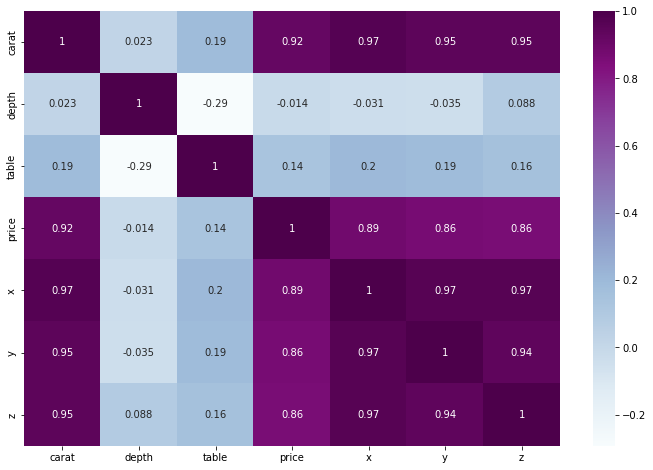

In [ ]:
#  في هذه الخطوة تم عرض الترابط بين الخصائص لتحديد اي منها اكثر اهم

print(diamond.corr())
plt.figure(figsize=(12,8))
sns.heatmap(diamond.corr(), annot=True, cmap="BuPu")

In [ ]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

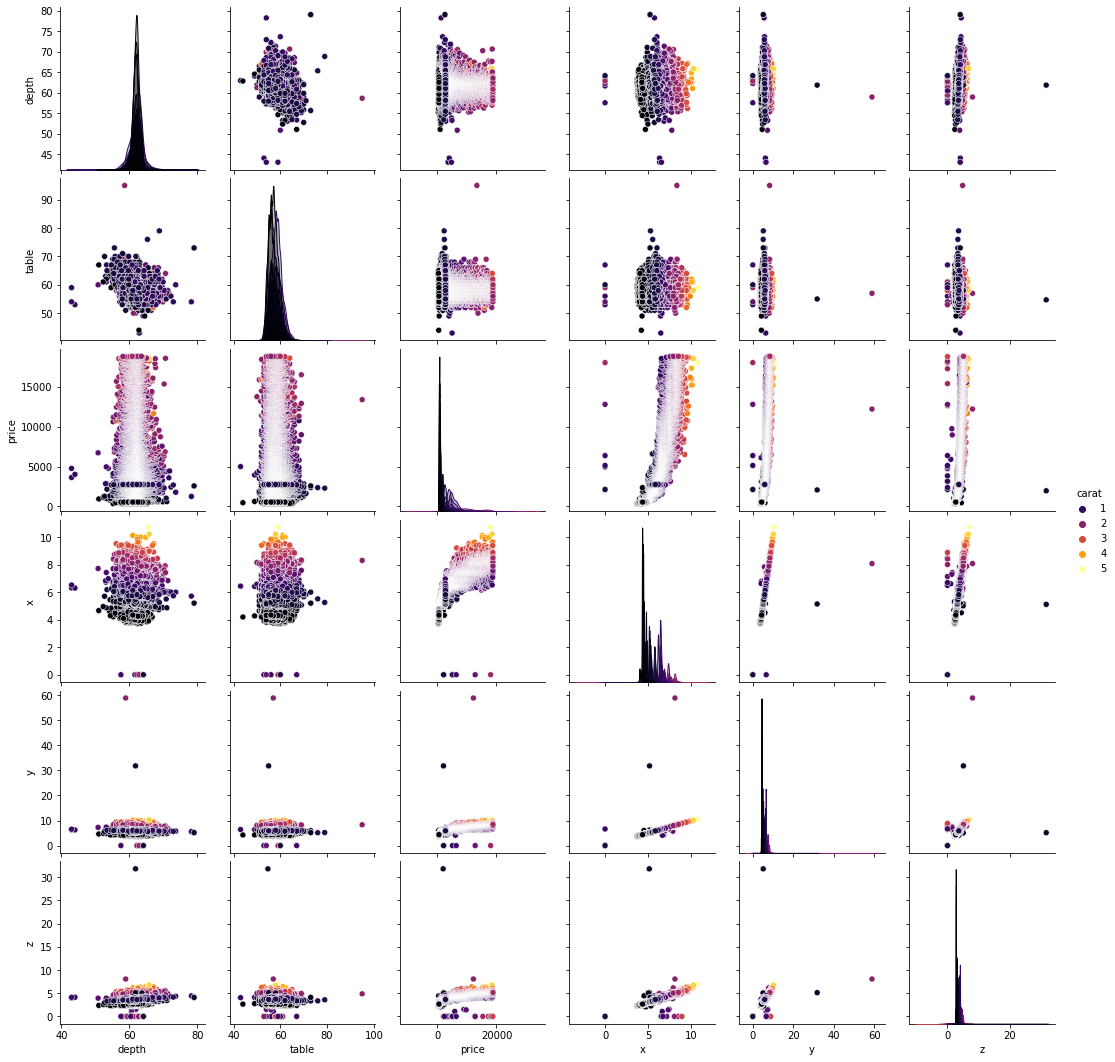

In [ ]:
ax = sns.pairplot(diamond, hue= "carat", palette="inferno") #, palette="muted"

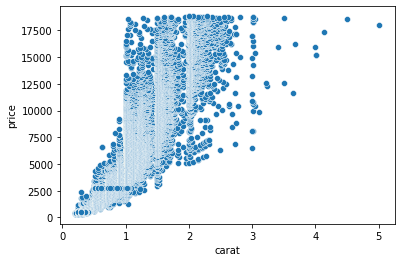

In [ ]:
sns.scatterplot(x= diamond['carat'], y= diamond['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


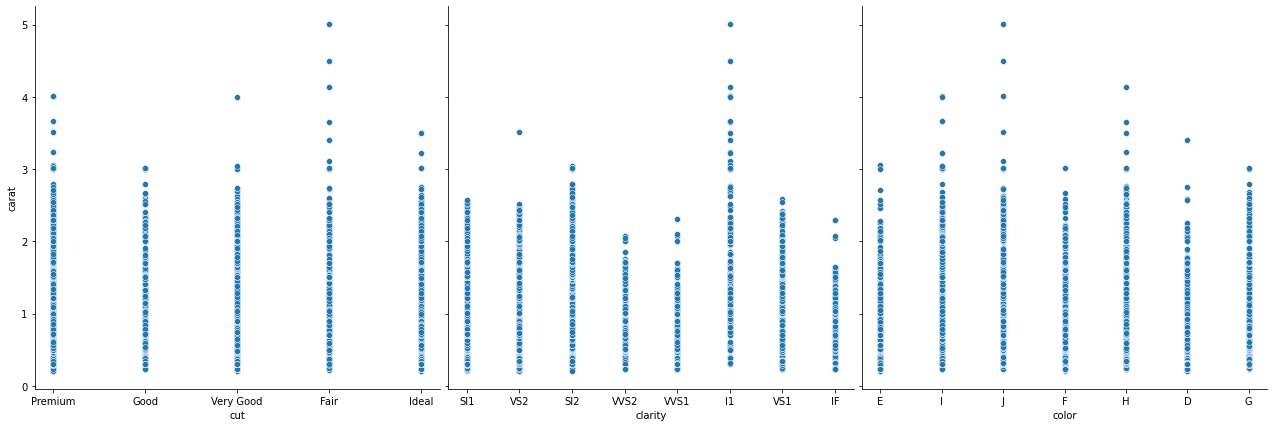

In [ ]:
# plot carat vs other Cs
sns.pairplot(diamond, x_vars=['cut', 'clarity', 'color'], y_vars = ['carat'], size=6)
plt.show()

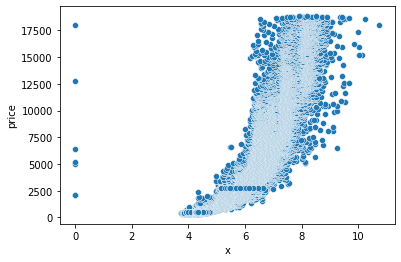

In [ ]:
sns.scatterplot(x= diamond['x'], y= diamond['price'])

       carat        cut color clarity  depth  table  price      x      y     z
20820   4.01    Premium     I      I1   61.0   61.0  15223  10.14  10.10  6.17
20821   4.01    Premium     J      I1   62.5   62.0  15223  10.02   9.94  6.24
21209   4.00  Very Good     I      I1   63.3   58.0  15984  10.01   9.94  6.31
22039   5.01       Fair     J      I1   65.5   59.0  18018  10.74  10.54  6.98
22227   4.50       Fair     J      I1   65.8   58.0  18531  10.23  10.16  6.72


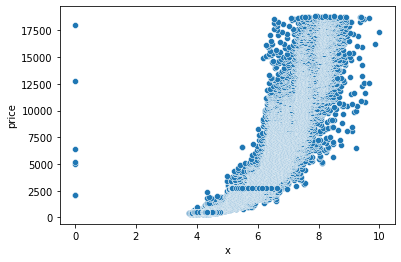

In [ ]:
print(diamond[(diamond['x'] > 10)])
diamond = diamond.drop(diamond[diamond['x'] > 10].index)
sns.scatterplot(x= diamond['x'], y= diamond['price'])

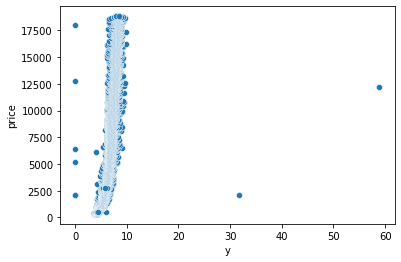

In [ ]:
sns.scatterplot(x= diamond['y'], y= diamond['price'])

       carat      cut color clarity  depth  table  price     x     y     z
19301   2.00  Premium     H     SI2   58.9   57.0  12210  8.09  58.9  8.06
39650   0.51    Ideal     E     VS1   61.8   55.0   2075  5.15  31.8  5.12


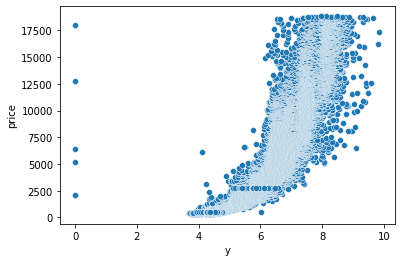

In [ ]:
print(diamond[(diamond['y'] > 30)])
diamond = diamond.drop(diamond[diamond['y'] > 30].index)
sns.scatterplot(x= diamond['y'], y= diamond['price'])

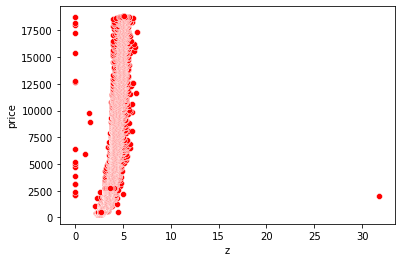

In [ ]:
sns.scatterplot(x= diamond['z'], y= diamond['price'], color='r')

       carat        cut color clarity  depth  table  price     x     y     z
39072   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12  5.15  31.8


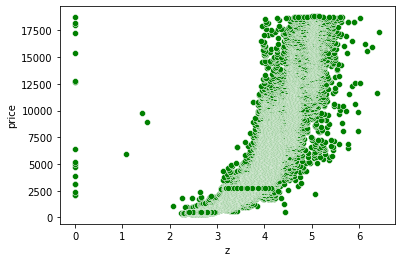

In [ ]:
print(diamond[(diamond['z'] > 30)]) 
#print( diamond[(diamond['z'] < 2)])     

diamond = diamond.drop(diamond[diamond['z'] > 30].index)
sns.scatterplot(x= diamond['z'], y= diamond['price'], color="g")

In [ ]:
#Dropping zero values from columns x, y, z
diamond = diamond.drop(diamond[diamond['x'] == 0].index)
diamond = diamond.drop(diamond[diamond['y'] == 0].index)
diamond = diamond.drop(diamond[diamond['z'] == 0].index)
diamond.shape

(43015, 10)

In [ ]:
diamond.isna().sum()/len(diamond)*100 #No Nan Values


carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [ ]:
diamond_copy=diamond
diamond_copy.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


**One Hot Encoder**
, There are three colums that need to be encoded ( Cut , clarity , color )

> *Please note that I worked on a copy of this project to get the renaming Right (https://colab.research.google.com/drive/1zIRtzflQp5vHZVp7IoE4y8xoBwBR8koL?usp=sharing)*




In [ ]:
test = pd.read_csv('/content/sample_data/test.csv')



test.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46


In [ ]:
diamond_copy['cut'].replace(('Fair','Good','Very Good','Premium','Ideal'),(1,2,3,4,5), inplace = True)
diamond_copy['color'].replace(('D','E','F','G','H','I','J'),(7,6,5,4,3,2,1), inplace = True)
diamond_copy['clarity'].replace(('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),(1,2,3,4,5,6,7,8),inplace = True)

test['cut'].replace(('Fair','Good','Very Good','Premium','Ideal'),(1,2,3,4,5), inplace = True)
test['color'].replace(('D','E','F','G','H','I','J'),(7,6,5,4,3,2,1), inplace = True)
test['clarity'].replace(('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),(1,2,3,4,5,6,7,8),inplace = True)


In [ ]:
Y=diamond_copy["price"]
Y=Y.astype('int')
X=diamond_copy.drop(labels=["price"],axis=1)
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31
1,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63
2,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75
3,0.24,3,1,6,62.8,57.0,3.94,3.96,2.48
4,0.24,3,2,7,62.3,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...
43035,0.72,4,7,3,62.7,59.0,5.69,5.73,3.58
43036,0.72,5,7,3,60.8,57.0,5.75,5.76,3.50
43037,0.72,2,7,3,63.1,55.0,5.69,5.75,3.61
43038,0.86,4,3,2,61.0,58.0,6.15,6.12,3.74


In [ ]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

#train.drop(columns=['x','y','z'], inplace=True)
#test.drop(columns=['x','y','z'], inplace=True)

cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','x','y','z']

scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [ ]:
model1 = RandomForestRegressor(n_estimators=120,random_state=30)
model1.fit(X_train_scaled,Y_train)

RandomForestRegressor(n_estimators=120, random_state=30)

In [ ]:

prediction_test=model1.predict(X_test_scaled)
forest_mse = mean_squared_error(Y_test, prediction_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


560.5404676285423

In [ ]:
feature_list=list(X.columns)
feature_imp=pd.Series(model1.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)


carat            0.560244
y                0.325583
clarity_SI2      0.018976
\tclarity_I1     0.015378
clarity_SI1      0.014251
J                0.010272
I                0.007598
clarity_VS2      0.007455
clarity_VS1      0.005561
H                0.005523
x                0.005260
z                0.004728
depth            0.003091
D                0.002710
G                0.002498
table            0.002276
clarity_VVS2     0.001903
E                0.001707
F                0.001505
cut_Ideal        0.000964
\tclarity_IF     0.000835
clarity_VVS1     0.000673
cut_Premium      0.000352
cut_Very Good    0.000290
cut_Good         0.000209
cut_Fair         0.000157
dtype: float64






**Improving the model!**

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features=['auto','sqrt']
max_depth =[2,4,6,8,10]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [ ]:
parma_grid={ 'n_estimators':n_estimators ,'max_features':max_features  ,'max_depth':max_depth , 
            'min_samples_split':min_samples_split ,'min_samples_leaf':min_samples_leaf ,
            'bootstrap':bootstrap }
print(parma_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_model = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_radomGrid= RandomizedSearchCV(estimator=rf_model,param_distributions=parma_grid,
                                 cv=3,verbose=2,n_jobs=6,scoring='neg_mean_squared_error',random_state=30,
                           return_train_score=True,n_iter=20)
rf_radomGrid.fit(X_train,Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20, n_jobs=6,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=30, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
prediction_test2=rf_radomGrid.predict(X_test)
forest_mse = mean_squared_error(Y_test, prediction_test2)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


554.6029247021012

In [ ]:
print(rf_radomGrid.best_params_)


In [ ]:
import joblib
joblib.dump(rf_radomGrid, "./random_forest.joblib")

['./random_forest.joblib']

# New Section

In [ ]:

submission = pd.DataFrame(prediction_test, columns=['price']).to_csv('prediction.csv')


In [ ]:
sample = pd.read_csv("/content/sample_data/sample_submission.csv")

In [ ]:
pd.read_csv('prediction.csv')

,Unnamed: 0,price
0,0,575.758333
1,1,3043.600000
2,2,6530.233333
3,3,14282.833333
4,4,508.325000
...,...,...
10778,10778,2592.308333
10779,10779,2645.375000
10780,10780,4309.508333
10781,10781,3142.225000


In [ ]:

test = test.drop(['Unnamed: 0'], axis=1)


In [ ]:
prediction_test=model1.predict(test)
prediction_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([13496.        , 13571.9       , 13561.13333333, ...,
       15727.60833333, 15727.60833333, 15727.60833333])

In [ ]:
sample = pd.read_csv("/content/sample_data/sample_submission.csv")
sample['price'] = prediction_test
sample.to_csv("submission.csv", index=False)
sample

,Unnamed: 0,price
0,1,13496.000000
1,3,13571.900000
2,8,13561.133333
3,10,13548.250000
4,12,13454.716667
...,...,...
10895,53922,15727.608333
10896,53923,15727.608333
10897,53933,15727.608333
10898,53934,15727.608333


In [ ]:
prediction=rf_radomGrid.predict(test)
sample['price'] = prediction
sample.to_csv("submission2.csv", index=False)
sample

,Unnamed: 0,price
0,1,416.076802
1,3,384.259844
2,8,411.834516
3,10,426.404131
4,12,460.736869
...,...,...
10895,53922,2768.791214
10896,53923,2926.046278
10897,53933,2893.326786
10898,53934,2975.343786
